In [30]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Multi-fidelity perovskites

In [31]:
multi_fidelity = pickle.load(open('mf_results.pkl', 'rb'))
single_fidelity = pickle.load(open('sf_results.pkl', 'rb'))

In [44]:
accumulated_cost = {'MultiFidelityPlanner': [], 'GPPlanner\n(single fidelity)': []}
for i in range(len(multi_fidelity)):
    accumulated_cost['MultiFidelityPlanner'].append(multi_fidelity[i]['s'].astype(float).sum())
    accumulated_cost['GPPlanner\n(single fidelity)'].append(len(single_fidelity[i]))

df = pd.DataFrame(accumulated_cost)
df = df.melt(var_name='Strategy', value_name='Cumulative cost [a.u.]')
df.head()

,Strategy,Cumulative cost [a.u.]
0,MultiFidelityPlanner,14.6
1,MultiFidelityPlanner,11.6
2,MultiFidelityPlanner,18.0
3,GPPlanner\n(single fidelity),50.0
4,GPPlanner\n(single fidelity),50.0


<Axes: xlabel='Strategy', ylabel='Cumulative cost [a.u.]'>

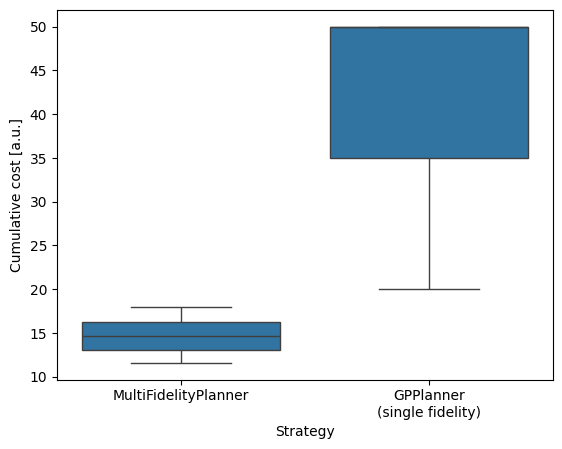

In [45]:
sns.boxplot(df, x='Strategy', y='Cumulative cost [a.u.]')

# Use of descriptors with high fidelity results

In [2]:
# load results
res_bo_wodesc = pickle.load(open('high_fidelity_results_wo_desc.pkl', 'rb'))
res_bo_wdesc = pickle.load(open('high_fidelity_results_w_desc.pkl', 'rb'))

In [3]:
cost_bo_wodesc = [len(df) for df in res_bo_wodesc]
cost_bo_wdesc = [len(df) for df in res_bo_wdesc]

print('mean cost_bo_wodesc : ', np.mean(cost_bo_wodesc))
print('mean cost_bo_wdesc : ', np.mean(cost_bo_wdesc))

plot_df = pd.DataFrame({
    'strategy': ['bo_wodesc' for _ in range(len(res_bo_wodesc))] + ['bo_wdesc' for _ in range(len(res_bo_wdesc))] , 
    'cost': cost_bo_wodesc + cost_bo_wdesc,
})

mean cost_bo_wodesc :  18.74
mean cost_bo_wdesc :  25.44


<Axes: xlabel='strategy', ylabel='cost'>

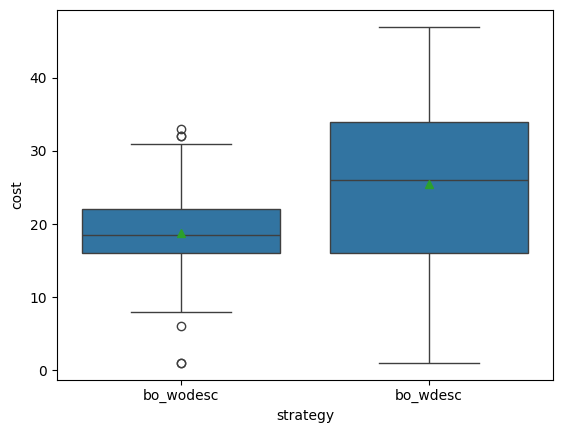

In [4]:
fig, ax = plt.subplots()
sns.boxplot(data=plot_df, x='strategy', y='cost', showmeans=True)